### 로지스틱 회귀
- 선형 회귀 기반 분류 모델
- 타겟(종속변수)가 범주형
- 알고리즘 결과 확률 (어떤 범주에 속할지) 반환
- 종류
	* 2진 분류: 타겟의 클래스가 2개
	* 다중분류: 타겟의 클래스가 3개 이상

In [40]:
import pandas as pd

# 판다스 지수표기법 정지 설정
pd.options.display.float_format = '{:.5f}'.format

# 
DATA_FILE = '../data/fish.csv'

In [41]:
fishDF = pd.read_csv(DATA_FILE)
fishDF.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.00000,25.40000,30.00000,11.52000,4.02000
1,Bream,290.00000,26.30000,31.20000,12.48000,4.30560
2,Bream,340.00000,26.50000,31.10000,12.37780,4.69610


In [42]:
print(pd.unique(fishDF['Species']))
# 타겟의 클래스 수: 7개

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [43]:
# 피쳐 데이터셋 추출
featureDF = fishDF[fishDF.columns[1:]].to_numpy()

print(f'featureDF => {featureDF.shape}, {featureDF.ndim}D')
print(featureDF[:5])

featureDF => (159, 5), 2D
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [44]:
# 타겟 추출
targetSR = fishDF['Species'].to_numpy()


print(f'targetSR => {targetSR.shape}, {targetSR.ndim}D')
print(targetSR[:5])

targetSR => (159,), 1D
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


#### 학습용/테스트용 데이터셋 준비

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                     random_state=10,
                                                    stratify=targetSR			# 클래스 비율에 맞추어 데이터셋 분리
                                                    )

#### 표준화 진행 
=> 정규분포		Q) 선형회귀여서 StandardScaler????

In [46]:
from sklearn.preprocessing import StandardScaler

# 학습용
ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

#### 학습 진행
- 학습방법: 지도학습>>>분류
- 알고리즘: 로지스틱 회귀
	* 피쳐에 가중치 곱한 수 합계한 결과 (종속변수=> 인코딩한 클래스???) >>> 확률값 (연속된 수치로 변환)
	(f1*w1 + f2*w2 + ...+ fn*wn + b )

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 지수표기법 대신 소수점 6자리 출력
np.set_printoptions(precision=6, suppress=True)

z = np.arange(-5,5,0.1)						# y=x???
phi = 1 / (1+np.exp(-z))					# 선형식의 결과값 >> 0.0~1.0 확률 값 변환하는 식

print(f'z => {z}\n\n phi= {phi}')

z => [-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
  4.8  4.9]

 phi= [0.006693 0.007392 0.008163 0.009013 0.009952 0.010987 0.012128 0.013387
 0.014774 0.016302 0.017986 0.01984  0.021881 0.024127 0.026597 0.029312
 0.032295 0.035571 0.039166 0.043107 0.047426 0.052154 0.057324 0.062973
 0.069138 0.075858 0.083173 0.091123 0.09975  0.109097 0.119203 0.130108
 0.141851 0.154465 0.167982 0.182426 0.197816 0.214165 0.231475 0.24974
 0.268941 0.28905  0.310026 0.331812 0.354344 0.377541 0.401312 0.425557
 0.450166 0.475021 0.5      0.524979 0.549

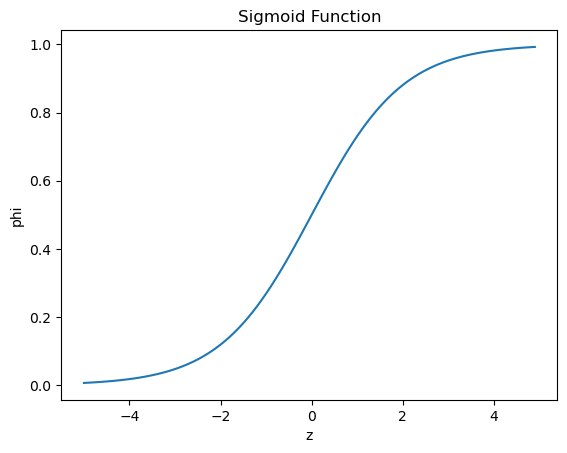

In [48]:
plt.plot(z, phi)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 이진 분류 w/ 로지스틱 회귀 

In [49]:
char_arr = np.array( ['A','B','C','D','E'])
print(char_arr[[True,False,True,False, False]])

['A' 'C']


In [50]:
# 이진 분류 => 2개 품종 데이터셋 추출
mask = (y_train == 'Bream') | (y_train=='Smelt')

train_bream_smelt = train_scaled[mask]
target_bream_smelt = y_train[mask]

mask = (y_test == 'Bream') | (y_test=='Smelt')
test_bream_smelt = test_scaled[mask]
test_target_bream_smelt = y_test[mask]


#### 학습진행

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [52]:
## 모델 파라미터
print(f'classes_ : {lr.classes_}  {len(lr.classes_)}개')
print(f'n_features_in_ : {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}')
print()
print(f'coef_ : {lr.coef_}')						# => f1, f2, f3, f4, f5
print(f'intercept_ : {lr.intercept_}')

classes_ : ['Bream' 'Smelt']  2개
n_features_in_ : 5
n_iter_ : [13]

coef_ : [[-0.443163 -0.600773 -0.684162 -1.027121 -0.767243]]
intercept_ : [-2.230105]


#### 모델 성능 평가
- accuracy
- score

In [53]:
train_score = lr.score(train_bream_smelt, target_bream_smelt)
test_score = lr.score(test_bream_smelt, test_target_bream_smelt)

print(f'train score => {train_score}')
print(f'test score => {test_score}')

train score => 1.0
test score => 1.0


#### 모델 테스팅 진행 => predict(피쳐2D)
* predict() : 예측 클래스 반환
* predict_proba() : 각 클래스별 확률값
* decision_function: sum(피쳐*Coef_) + intercept_ 의 결과값

In [54]:
print(lr.predict(train_bream_smelt[:5]))

['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']


In [55]:
print(f'클래스 => {lr.classes_}\n')
print(lr.predict_proba(train_bream_smelt[:5]))

''' 
[Bream 확률][Smelt 확률]		=> 합하면 1 (이진분류니까)
[[0.03185  0.96815 ]		
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]
'''

클래스 => ['Bream' 'Smelt']

[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]


' \n[Bream 확률][Smelt 확률]\t\t=> 합하면 1 (이진분류니까)\n[[0.03185  0.96815 ]\t\t\n [0.070079 0.929921]\n [0.999494 0.000506]\n [0.934717 0.065283]\n [0.994045 0.005955]]\n'

In [56]:
#  sum(피쳐*Coef_) + intercept_ 의 결과값
# 	y = 'Weight'*coef_[0] + 'Length'*coef_[1] + 'Diagonal'*coef_[2] + 'Height'*coef_[3] + 'Width'*coef_[4] + intercept_

decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([ 3.414347,  2.585481, -7.588453, -2.66151 , -5.117616])

In [58]:
from scipy.special import expit

print(expit(decisions))					# 선형식 결과값 (위의 decisions)  >>> 확률 변환
										# 클래스==1 에 대한 확률 결과
print()                                        
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.predict(train_bream_smelt[:5]))

[0.96815  0.929921 0.000506 0.065283 0.005955]

[[0.03185  0.96815 ]
 [0.070079 0.929921]
 [0.999494 0.000506]
 [0.934717 0.065283]
 [0.994045 0.005955]]
['Smelt' 'Smelt' 'Bream' 'Bream' 'Bream']
